# ASSIGNMENT 2

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Problem 1

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [3]:
ds_1 = pd.read_csv('.\Problem Set 2 - Data\Problem Set 2 - Problem 1.csv') 
ds_1 = ds_1.to_numpy()
X = ds_1[:,1:3]
y = ds_1[:,3]
model_1 = LinearDiscriminantAnalysis()
model_1.fit(X, y)
print(model_1.coef_/np.linalg.norm(model_1.coef_))

[[ 0.82065438 -0.57142487]]


# Problem 2

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
ds_2 = pd.read_csv('.\Problem Set 2 - Data\Problem Set 2 - Problem 2.csv') 
ds_2 = ds_2.to_numpy()
X = ds_2[:,1:4]
y = ds_2[:,4]
model_2 = GaussianNB()
model_2.fit(X, y)
Test_2 = [[0.43, 0.44, 0.61],[0.45,0.32,0.32]]
predproba_2 = model_2.predict_proba(Test_2)
pred_2 = model_2.predict(Test_2)
print(predproba_2) 
print(pred_2)
np.unique(y)

[[4.91004618e-01 9.80967567e-08 6.17102024e-04 5.08378182e-01]
 [5.33933386e-01 1.89591616e-01 1.03145461e-05 2.76464683e-01]]
['Rest' 'LMI']


array(['LMI', 'MA', 'RMI', 'Rest'], dtype=object)

# Problem 3

In [6]:
ds_3 = pd.read_csv('.\Problem Set 2 - Data\Problem Set 2 - Problem 3.csv') 
ds_3 = ds_3.to_numpy()
X = ds_3[:,1:3]
y = ds_3[:,3]

Euclidean_distance

In [7]:
def e_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

Find k nearest neighbors

In [8]:
def neighbours(X_train, y_train, X_test, k):
    neighbors = []
    for i in range(len(X_train)):
        distance = e_distance(X_train[i], X_test)
        neighbors.append((X_train[i], y_train[i], distance))
        neighbors.sort(key=lambda x: x[2])
    return neighbors[:k]

Predict

In [9]:
def predict(X_train, y_train, x_test, k):
    neighbors = neighbours(X_train, y_train, x_test, k)
    labels = {}
    for neighbor in neighbors:
        label = neighbor[1]
        labels[label] = labels.get(label, 0) + 1
        return max(labels, key=labels.get)

Leave one out cross validation 

In [10]:
def loocv(X,y,k):
    correct = 0
    total = 0
    for i in range(len(X)):
        x_test = X[i]
        y_test = y[i]
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i, axis=0)
        y_pred = predict(X_train, y_train, x_test, k)
        if y_pred == y_test:
            correct += 1
        total += 1
    return correct/total

In [11]:
k = 9
accuracy = loocv(X,y,k)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6666666666666666


Use knn model and loocv from sklearn library

In [12]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
knn = KNeighborsClassifier(n_neighbors=4)
loo = LeaveOneOut()
y_true = []
y_pred = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_true.append(y_test)
    y_pred.append(knn.predict(X_test))
ac = accuracy_score(y_true, y_pred)
print(ac)

0.6666666666666666


# Problem 4

Question 1

In [14]:
from sklearn.model_selection import LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score 

In [15]:
ds_4 = pd.read_csv('.\Problem Set 2 - Data\Problem Set 2 - Problem 4.csv') 
ds_4 = ds_4.to_numpy()
X = ds_4[:,1:5]
y = ds_4[:,5]
LDA = LinearDiscriminantAnalysis()
LOOCV = LeaveOneOut()
y_true = []
y_pred = []
for train_index, test_index in LOOCV.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LDA.fit(X_train, y_train)
    y_true.append(y_test)
    y_pred.append(LDA.predict(X_test))
ac = accuracy_score(y_true, y_pred)
print(ac)
print(LDA.coef_/np.linalg.norm(LDA.coef_))


0.85
[[-0.11013017  0.74571524  0.42921141  0.49755171]]


Question 2

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
ds_4 = pd.read_csv('.\Problem Set 2 - Data\Problem Set 2 - Problem 4.csv') 
ds_4 = ds_4.to_numpy()
X = ds_4[:,1:5]
y = ds_4[:,5]
model_4 = GaussianNB()
model_4.fit(X, y)
Test_4 = [[40, 110, 150, 28], [25, 90,135,26], [65,90,95,22]]
predproba_4 = model_4.predict_proba(Test_4)
pred_4 = model_4.predict(Test_4)
print(predproba_4) 
print(pred_4)

[[1.94962046e-05 9.99980504e-01]
 [1.28119288e-01 8.71880712e-01]
 [9.99518400e-01 4.81600145e-04]]
['Yes' 'Yes' 'No']


# Problem 5

In [18]:
ds_5 = pd.read_csv('.\Problem Set 2 - Data\Problem Set 2 - Problem 5.csv') 
ds_5 = ds_5.to_numpy()
X = ds_5[:,1:5]
y = ds_5[:,5]
model_5 = GaussianNB()
model_5.fit(X, y)
Test_5 = [[25, 90, 135, 26]]
predproba_5 = model_5.predict_proba(Test_5)
pred_5 = model_5.predict(Test_5)
print(predproba_5) 
print(pred_5)

[[0.0257735 0.9742265]]
['Yes']


# Problem 6

In [19]:
ds_6 = pd.read_csv('.\Problem Set 2 - Data\Problem Set 2 - Problem 6.csv') 
ds_6 = ds_6.to_numpy()
X = ds_6[:,1:3]
y = ds_6[:,0]
model_6 = GaussianNB()
model_6.fit(X, y)
Test_6 = [[2.9, 145],[2.6,103],[2.8,120]]
predproba_6 = model_6.predict_proba(Test_6)
pred_6 = model_6.predict(Test_6)
print(predproba_6) 
print(pred_6)

[[0.62715807 0.37284193]
 [0.60081275 0.39918725]
 [0.74265748 0.25734252]]
['Apple' 'Apple' 'Apple']


# Problem 7

Part 1.

In [20]:
import numpy as np
from scipy.signal import convolve2d

img = np.array([
    [202, 225, 168, 23, 37, 33],
    [251, 114, 63, 66, 32, 56],
    [201, 40, 245, 92, 213, 216],
    [70, 230, 132, 2, 44, 146],
    [8, 218, 171, 10, 193, 48],
    [53, 33, 30, 247, 53, 79]
])  

kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

result = convolve2d(img, kernel, mode='same')
result = np.clip(result, 0, 255)
print(result)


[[255 255 255   0  97  72]
 [255   0   0 120   0   0]
 [255   0 255   0 255 255]
 [  0 255  12   0   0 255]
 [  0 255 255   0 255   0]
 [224   0   0 255   0 255]]


Part 2.a

In [21]:
CImg = np.array([
    [255, 255, 255,   0,  97,  72],
    [255,   0,   0, 120,   0,   0],
    [255,   0, 255,   0, 255, 255],
    [  0, 255,  12,   0,   0, 255],
    [  0, 255, 255,   0, 255,   0],
    [224,   0,   0, 255,   0, 255]
], dtype = np.uint8)  

pool_size = (2, 2)
stride = 2

pooled_CImg = np.zeros((CImg.shape[0] // stride, CImg.shape[1] // stride))

for i in range(0, CImg.shape[0] - pool_size[0] + 1, stride):
    for j in range(0, CImg.shape[1] - pool_size[1] + 1, stride):
        pooled_CImg[i // stride, j // stride] = np.max(CImg[i:i + pool_size[0], j:j + pool_size[1]])

print(pooled_CImg)

[[255. 255.  97.]
 [255. 255. 255.]
 [255. 255. 255.]]


Part 2.b

In [22]:
CImg = np.array([
    [255, 255, 255,   0,  97,  72],
    [255,   0,   0, 120,   0,   0],
    [255,   0, 255,   0, 255, 255],
    [  0, 255,  12,   0,   0, 255],
    [  0, 255, 255,   0, 255,   0],
    [224,   0,   0, 255,   0, 255]
], dtype = np.uint8)  

pool_size = (2, 2)
stride = 2

pooled_CImg = np.zeros((CImg.shape[0] // stride, CImg.shape[1] // stride))

for i in range(0, CImg.shape[0] - pool_size[0] + 1, stride):
    for j in range(0, CImg.shape[1] - pool_size[1] + 1, stride):
        pooled_CImg[i // stride, j // stride] = np.mean(CImg[i:i + pool_size[0], j:j + pool_size[1]]).astype(np.uint8)

print(pooled_CImg)

[[191.  93.  42.]
 [127.  66. 191.]
 [119. 127. 127.]]


# Problem 8

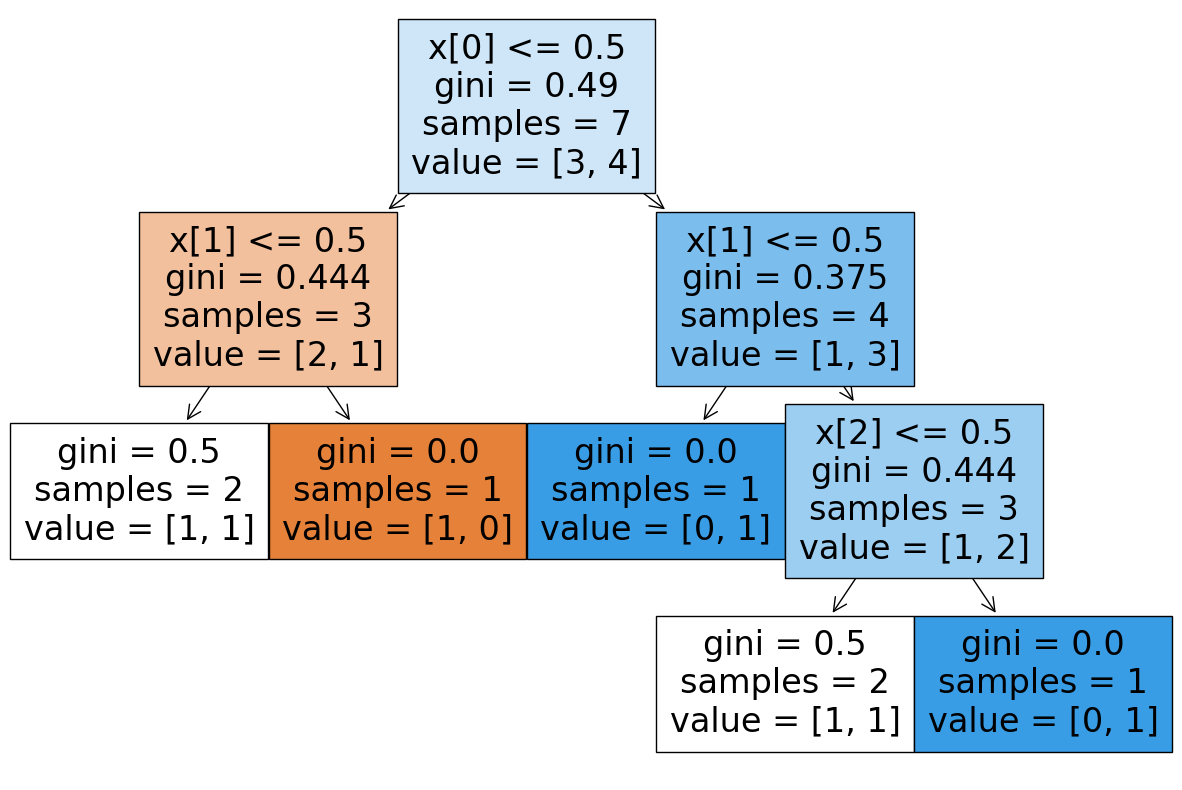

In [23]:
from sklearn import tree
X = [[0, 0, 1], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 0]]
Y = [0, 0, 0, 1, 1, 1, 1]
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X, Y)

plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [24]:
pred1 = clf.predict([[1, 0, 1]])  # A=1, B=0, C=1
pred2 = clf.predict([[0, 0, 0]])  # A=0, B=0, C=0
print("Prediction for A=1, B=0, C=1: ", pred1)
print("Prediction for A=0, B=0, C=0: ", pred2)

Prediction for A=1, B=0, C=1:  [1]
Prediction for A=0, B=0, C=0:  [0]
